In [253]:
import pandas as pd
import numpy as np

In [254]:
url = "https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%EC%A3%BC%ED%83%9D%EB%8F%84%EC%8B%9C%EB%B3%B4%EC%A6%9D%EA%B3%B5%EC%82%AC_%EC%A0%84%EA%B5%AD%20%EC%8B%A0%EA%B7%9C%20%EB%AF%BC%EA%B0%84%EC%95%84%ED%8C%8C%ED%8A%B8%20%EB%B6%84%EC%96%91%EA%B0%80%EA%B2%A9%20%EB%8F%99%ED%96%A5_20211130.csv"
df = pd.read_csv(url,encoding='cp949')
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [255]:
df.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"
6289,제주,전용면적 102제곱미터초과,2021,11,"6,815"


In [256]:
df['연도'].max(),df['연도'].min()

(2021, 2015)

In [257]:
# 2015년도 부터 데이터가 존재
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6290 non-null   object
 1   규모구분        6290 non-null   object
 2   연도          6290 non-null   int64 
 3   월           6290 non-null   int64 
 4   분양가격(제곱미터)  5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


In [258]:
# 결측치 확인
df.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    478
dtype: int64

In [259]:
# 데이터 타입변경 : 
type(df['분양가격(제곱미터)'][0])

str

In [260]:
int(df['분양가격(제곱미터)'][0])*3.3  # 단위는 천단위

19275.3

In [261]:
df['분양가격(제곱미터)'].fillna(0, inplace=True)

In [262]:
df['분양가격(제곱미터)'] = pd.to_numeric(df['분양가격(제곱미터)'],errors='coerce')

In [263]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  6026 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 245.8+ KB


In [264]:
df['평당가격'] = df['분양가격(제곱미터)']*3.3
df.columns = ['지역명', '규모구분', '연도', '월', '분양가격(제곱미터)',  '평당가격(천원)']

In [265]:
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [266]:
df.drop(['평당가격(천원)'],axis=1,inplace=True)

In [267]:
df['평당가격(천원)'] = df['분양가격(제곱미터)']*3.3
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [268]:
df['평당가격(천원)'].describe()

count     6026.000000
mean     10481.963707
std       5413.364968
min          0.000000
25%       8012.400000
50%       9748.200000
75%      12646.425000
max      45655.500000
Name: 평당가격(천원), dtype: float64

In [269]:
df['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [270]:
# 모든면적' 1 , '전용면적 60제곱미터이하'2, '전용면적 60제곱미터초과 85제곱미터이하'3,
#        '전용면적 85제곱미터초과 102제곱미터이하'4, '전용면적 102제곱미터초과'5

In [271]:
df['규모구분']=df['규모구분'].str.replace('모든면적','전체')
df['규모구분']=df['규모구분'].str.replace('전용면적 60제곱미터이하','~60')
df['규모구분']=df['규모구분'].str.replace('전용면적 60제곱미터초과 85제곱미터이하','60~85')
df['규모구분']=df['규모구분'].str.replace('전용면적 85제곱미터초과 102제곱미터이하','85~102')
df['규모구분']=df['규모구분'].str.replace('전용면적 102제곱미터초과','102~')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  6026 non-null   float64
 5   평당가격(천원)    6026 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 295.0+ KB


In [273]:
# group by를 이용한 데이터 분석
# 지역별 평당분양가격 2015 ~2021
df.groupby(['지역명'])['평당가격(천원)'].mean()

지역명
강원     8273.248732
경기    13775.231831
경남     9506.946761
경북     8391.741972
광주     9432.329310
대구    12640.217746
대전     7864.900283
부산    12510.950704
서울    24973.185674
세종     8671.609859
울산     7207.802528
인천    12748.569296
전남     7972.688764
전북     7894.232113
제주    10353.534375
충남     8077.330986
충북     7837.806761
Name: 평당가격(천원), dtype: float64

In [274]:
# 연도별 지역별 평당분양가격
df.groupby(['연도','지역명'])['평당가격(천원)'].mean()

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2021  전남      9446.370732
      전북      8581.815000
      제주     14344.053659
      충남      9163.357500
      충북      8805.142500
Name: 평당가격(천원), Length: 119, dtype: float64

In [275]:
# 전용면적별
df.groupby(['규모구분'])['평당가격(천원)'].mean()

규모구분
102~      10936.488270
60~85     10805.629909
85~102     9479.953234
~60       10334.733887
전체        10853.700000
Name: 평당가격(천원), dtype: float64

In [276]:
# 지역별, 전용면적별 평당가격 평균

In [277]:
df.groupby(['규모구분','지역명'])['평당가격(천원)'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
102~,9641.763380,15200.171831,9353.454930,9285.595775,10689.094030,13977.126761,6562.535294,13340.412676,24130.562500,9576.088732,6081.395833,14260.833803,9054.084507,8422.436620,9622.753521,7950.861972,8454.925352
60~85,8011.191549,12993.633803,9062.961972,8549.695775,10706.315493,12770.163380,10162.280282,12386.619718,23926.161972,8933.471831,9956.518310,12355.292958,7830.016901,7602.223944,12734.328169,8167.174648,7547.657746
85~102,7398.600000,14170.804225,11265.130986,7039.364789,5282.086765,10873.639437,3404.087500,12422.269014,28091.319718,8952.807042,2439.304225,12641.138028,7738.087500,7960.947887,5128.292958,8014.305634,8269.753521
~60,8273.239437,13480.360563,8752.947887,8515.580282,9592.821127,12818.361972,8989.385915,11966.404225,24676.702817,6489.798592,7690.022535,12210.604225,7418.725352,7851.164789,11484.582353,8108.843662,7419.515493
전체,8041.449296,13031.188732,9100.238028,8568.473239,10786.770423,12761.797183,10214.011268,12439.047887,24053.049296,9405.883099,9887.636620,12274.977465,7825.833803,7634.387324,12845.505634,8145.469014,7497.181690


In [278]:
df2 = df.groupby(['연도','지역명'])['평당가격(천원)'].mean()
df2.unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0600,11060.9400,8459.220,7464.1600,7916.700000,9018.9000,8190.600000,10377.4000,20315.680000,8765.020,9367.60000,10976.020,6798.880000,7110.400,7951.075000,7689.8800,6828.8000
2016,6207.8500,11684.9700,8496.730,7753.4050,8556.843103,10282.0300,6796.322034,10743.5350,21753.435000,8857.805,9263.15500,11099.055,6936.600000,6906.625,8918.837288,7958.2250,7133.3350
2017,7318.8500,12296.1850,8806.600,8011.7950,8479.735000,10972.7750,9417.265000,11637.6150,21864.095000,8980.730,8149.79000,11672.430,7413.230000,7035.820,11155.210000,7885.4050,7462.5650
2018,8219.2550,14258.4200,9327.670,7523.3400,7145.215000,11532.2900,7675.580000,12889.9650,23202.245000,9823.440,3755.18000,11089.430,7929.845000,8174.595,9946.640000,7518.3350,8149.2950
2019,8934.4750,15665.5400,10162.735,9050.2500,8881.895000,14081.6500,9043.760000,13537.8650,28286.830000,9604.485,2043.25000,13249.775,7945.300000,8532.260,10251.340000,8019.7700,7970.8750
2020,9615.5950,15106.0800,9827.345,7998.1550,12512.720000,15314.2000,7117.935000,13353.0100,29781.015000,3488.430,9414.24000,14982.990,8924.905000,8559.430,9225.370000,8377.7650,8080.3250
2021,10285.5225,14590.5375,11270.325,11172.2325,12042.182927,15525.4275,6708.742857,13900.1775,26645.407317,12541.320,11412.84878,15887.025,9446.370732,8581.815,14344.053659,9163.3575,8805.1425


In [279]:
df2.unstack().transpose()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,6207.850000,7318.850,8219.255,8934.475,9615.595,10285.522500
경기,11060.940,11684.970000,12296.185,14258.420,15665.540,15106.080,14590.537500
경남,8459.220,8496.730000,8806.600,9327.670,10162.735,9827.345,11270.325000
경북,7464.160,7753.405000,8011.795,7523.340,9050.250,7998.155,11172.232500
광주,7916.700,8556.843103,8479.735,7145.215,8881.895,12512.720,12042.182927
대구,9018.900,10282.030000,10972.775,11532.290,14081.650,15314.200,15525.427500
대전,8190.600,6796.322034,9417.265,7675.580,9043.760,7117.935,6708.742857
부산,10377.400,10743.535000,11637.615,12889.965,13537.865,13353.010,13900.177500
서울,20315.680,21753.435000,21864.095,23202.245,28286.830,29781.015,26645.407317


In [280]:
# matplot 라이브러리에 한글 적용
import matplotlib.pyplot as plt

In [281]:
import platform
platform.system()

'Windows'

In [282]:
plt.rc('font', family='Malgun Gothic')

In [283]:
# 지역별 분양가격의 평균을 구한다음 시각화
df3 = df.groupby(['지역명'])['평당가격(천원)'].mean()
df3.values, df3.index

(array([ 8273.24873239, 13775.23183099,  9506.94676056,  8391.74197183,
         9432.32931034, 12640.21774648,  7864.90028329, 12510.95070423,
        24973.18567416,  8671.60985915,  7207.80252809, 12748.56929577,
         7972.68876404,  7894.23211268, 10353.534375  ,  8077.33098592,
         7837.80676056]),
 Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
        '전남', '전북', '제주', '충남', '충북'],
       dtype='object', name='지역명'))

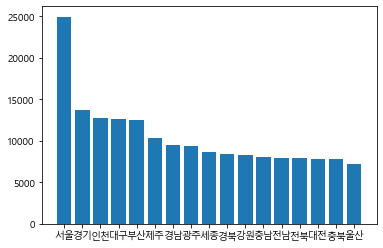

In [284]:
df3 = df3.sort_values(ascending=False)
plt.bar(df3.index,df3.values)
# plt.plot(df3.index, df3.values)
plt.show()

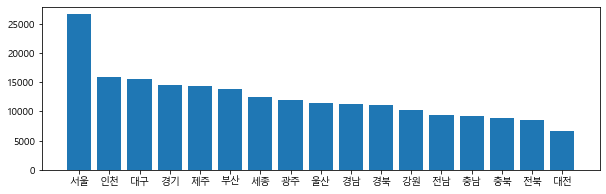

In [285]:
df4 = df[( df['연도'] == 2021)].groupby(['지역명'])['평당가격(천원)'].mean()
df4 = df4.sort_values(ascending=False)
plt.figure(figsize=(10,3))
plt.bar(df4.index,df4.values)
plt.show()

In [286]:
# 전용면적별 분양가격의 평균
df.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),평당가격(천원)
0,서울,전체,2015,10,5841.0,19275.3


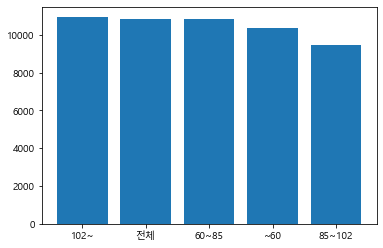

In [287]:
df5 = df.groupby(['규모구분'])['평당가격(천원)'].mean()
df5 = df5.sort_values(ascending=False)
plt.bar(df5.index, df5.values)
plt.show()

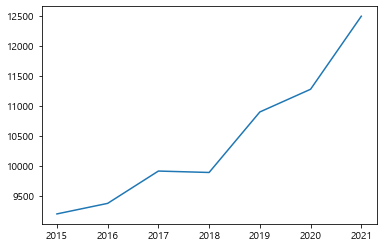

In [288]:
# 연도별 분양가 - 연속성을 가지는 데이터.. plot 점을 연결한 선... 
df6 = df.groupby(['연도'])['평당가격(천원)'].mean()
plt.plot(df6.index, df6.values)
plt.show()

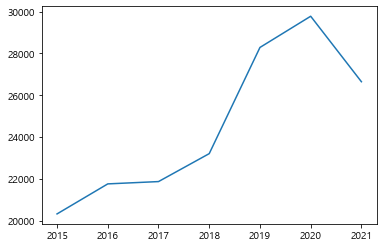

In [293]:
df[df['지역명'] == '서울']
df7 = df[df['지역명'] == '서울'].groupby(['연도'])['평당가격(천원)'].mean()
plt.plot(df7.index, df7.values)
plt.show()

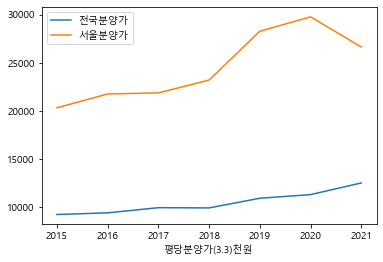

In [294]:
plt.plot(df6.index, df6.values)
plt.plot(df7.index, df7.values)
plt.xlabel('연도')
plt.xlabel('평당분양가(3.3)천원')
plt.legend(['전국분양가','서울분양가'])
plt.show()

In [298]:
df8 = df[df['지역명'] != '서울'].groupby(['연도'])['평당가격(천원)'].mean()

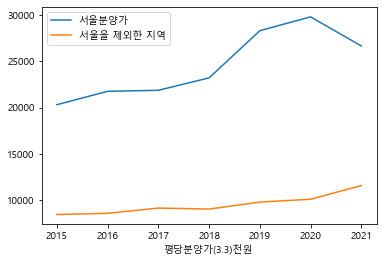

In [299]:
plt.plot(df7.index, df7.values)
plt.plot(df8.index, df8.values)
plt.xlabel('연도')
plt.xlabel('평당분양가(3.3)천원')
plt.legend(['서울분양가','서울을 제외한 지역'])
plt.show()

In [300]:
import seaborn as sns

In [319]:
df3 = pd.DataFrame(df3)
# df3.reset_index =  np.arange(17)
# df3
df3

,평당가격(천원)
0,24973.185674
1,13775.231831
2,12748.569296
3,12640.217746
4,12510.950704
5,10353.534375
6,9506.946761
7,9432.329310
8,8671.609859
9,8391.741972


<AxesSubplot:>

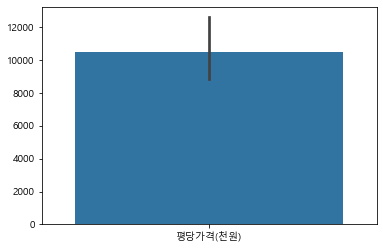

In [304]:
# 지역별 평당분양가